In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [2]:
np.random.seed(125) # So that others can get same results as I did
lats = np.random.randint(-90, 80, size = 500)
longs = np.random.randint(-180, 180, size = 500)
coords = pd.DataFrame({
    "Latitude": lats,
    "Longitude": longs,
})

coords.head(5)

,Latitude,Longitude
0,67,72
1,-3,134
2,-23,19
3,20,-74
4,-47,20


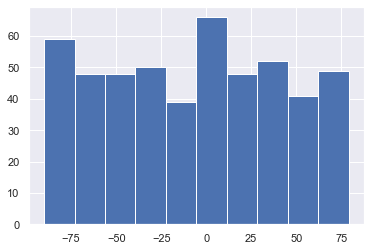

In [3]:
seaborn.set()

plt.hist(coords['Latitude'])
plt.show()

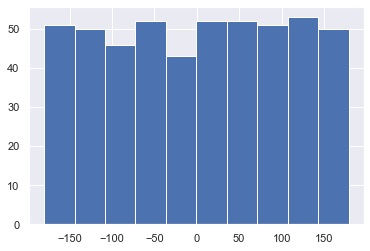

In [4]:
plt.hist(coords['Longitude'])
plt.show()

In [5]:
from secrets import API_KEY
from citipy import citipy
import requests
import time

def get_weather_data(coords, time_between = 1):
    """Queries the OpenWeatherAPI for data.

    Args:
        coords: A Pandas DataFrame with rows containing 'latitude'
            and 'longitude' columns.
        time_between: An integer specifying the sleep time in seconds
            between each API ping.  Defaults to the OpenWeatherAPI's
            recommended limit of 1 request per second.

    Returns:
        A list of nested dicts (loaded JSON results).
    """
    results = []
    for ind, row in coords.iterrows():
        lat, lon = row['Latitude'], row['Longitude']
        query = f"http://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&APPID={API_KEY}"

        clean_url = query.rpartition("&")[0]  # Don't log your api key!
        logger.info(f"Call {ind}: ({lat}, {lon}) - {clean_url}")

        city = citipy.nearest_city(lat, lon)
        logger.info(f"Call {ind}: {city.city_name} {clean_url})")

        response = requests.get(query)
        results.append(response.json())
        time.sleep(time_between)
    return results

In [6]:
import logging

logger = logging.getLogger('weather')
logger.setLevel(logging.INFO)
fh = logging.FileHandler('api_calls.log')
formatter = logging.Formatter('%(asctime)s - %(message)')
fh.setFormatter(formatter)
logger.addHandler(fh)

In [18]:
test_coords = pd.DataFrame({"Latitude": [28.457523], "Longitude": [77.026344]})
test_results = get_weather_data(test_coords)
test_results

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\SINGHS\AppData\Local\Programs\Python\Python37\lib\logging\__init__.py", line 1025, in emit
    msg = self.format(record)
  File "C:\Users\SINGHS\AppData\Local\Programs\Python\Python37\lib\logging\__init__.py", line 869, in format
    return fmt.format(record)
  File "C:\Users\SINGHS\AppData\Local\Programs\Python\Python37\lib\logging\__init__.py", line 611, in format
    s = self.formatMessage(record)
  File "C:\Users\SINGHS\AppData\Local\Programs\Python\Python37\lib\logging\__init__.py", line 580, in formatMessage
    return self._style.format(record)
  File "C:\Users\SINGHS\AppData\Local\Programs\Python\Python37\lib\logging\__init__.py", line 422, in format
    return self._fmt % record.__dict__
ValueError: incomplete format
Call stack:
  File "C:\Users\SINGHS\AppData\Local\Programs\Python\Python37\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\SINGHS\AppData\Local\Pro

[{'coord': {'lon': 77.03, 'lat': 28.46},
  'weather': [{'id': 721,
    'main': 'Haze',
    'description': 'haze',
    'icon': '50n'}],
  'base': 'stations',
  'main': {'temp': 307.15,
   'feels_like': 309.37,
   'temp_min': 307.15,
   'temp_max': 307.15,
   'pressure': 1001,
   'humidity': 46},
  'visibility': 3500,
  'wind': {'speed': 2.6, 'deg': 330},
  'clouds': {'all': 40},
  'dt': 1600523220,
  'sys': {'type': 1,
   'id': 9165,
   'country': 'IN',
   'sunrise': 1600475934,
   'sunset': 1600519949},
  'timezone': 19800,
  'id': 1270642,
  'name': 'Gurgaon',
  'cod': 200}]

In [8]:
full_results = get_weather_data(coords)
full_results[:3]

back()
  File "C:\Users\SINGHS\AppData\Local\Programs\Python\Python37\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\Users\SINGHS\AppData\Local\Programs\Python\Python37\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Users\SINGHS\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\SINGHS\AppData\Local\Programs\Python\Python37\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\SINGHS\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\SINGHS\AppData\Local\Programs\Python\Python37\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\SINGHS\AppData\Local\Programs\Pyth

[{'coord': {'lon': 72, 'lat': 67},
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04n'}],
  'base': 'stations',
  'main': {'temp': 277.98,
   'feels_like': 275.46,
   'temp_min': 277.98,
   'temp_max': 277.98,
   'pressure': 1003,
   'humidity': 82,
   'sea_level': 1003,
   'grnd_level': 1003},
  'visibility': 10000,
  'wind': {'speed': 1.22, 'deg': 86},
  'clouds': {'all': 62},
  'dt': 1600522788,
  'sys': {'country': 'RU', 'sunrise': 1600476255, 'sunset': 1600522043},
  'timezone': 18000,
  'id': 1486321,
  'name': 'Yar-Sale',
  'cod': 200},
 {'coord': {'lon': 134, 'lat': -3},
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04n'}],
  'base': 'stations',
  'main': {'temp': 295.47,
   'feels_like': 299.1,
   'temp_min': 295.47,
   'temp_max': 295.47,
   'pressure': 1011,
   'humidity': 93,
   'sea_level': 1011,
   'grnd_level': 989},
  'visibility': 10000,
  'wind': {'speed': 0.89, 'deg':

In [9]:
import json

with open("weather.json", "w") as outfile:
    json.dump(full_results, outfile)

In [10]:
def k_to_c(temp):
    """Converts a Kelvin temperature to Celcius"""
    return temp + 273.15

def mps_to_kmph(speed):
    """Converts a meters/s speed to km/hour"""
    return speed * 5793.6384

In [11]:
important_json_data = []
for point in full_results:
    lat = point['coord']['lat']
    lon = point['coord']['lon']
    temp = k_to_c(point['main']['temp'])
    humidity = point['main']['humidity']
    cloudiness = point['clouds']['all']
    wind = mps_to_kmph(point['wind']['speed'])

    row = [lat, lon, temp, humidity, cloudiness, wind]
    important_json_data.append(row)

weather_df = pd.DataFrame(important_json_data)
weather_df.columns = [
    "latitude",
    "longitude",
    "temperature",
    "humidity",
    "cloudiness", 
    "wind"
]
weather_df.head()

,latitude,longitude,temperature,humidity,cloudiness,wind
0,67,72,551.13,82,62,7068.238848
1,-3,134,568.62,93,58,5156.338176
2,-23,19,578.96,10,0,28215.019008
3,20,-74,574.82,77,0,36731.667456
4,-47,20,551.62,92,100,68596.678656


In [12]:
weather_df.to_csv("weather.csv")

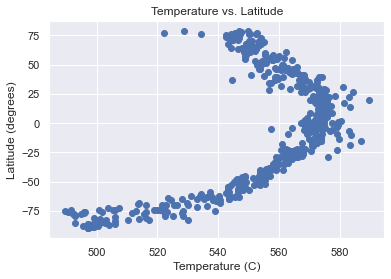

In [13]:
plt.scatter(weather_df.temperature, weather_df.latitude)
plt.xlabel("Temperature (C)")
plt.ylabel("Latitude (degrees)")
plt.title("Temperature vs. Latitude")
plt.show()

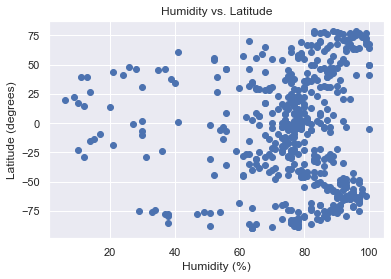

In [14]:
plt.scatter(weather_df.humidity, weather_df.latitude)
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude (degrees)")
plt.title("Humidity vs. Latitude")
plt.show()

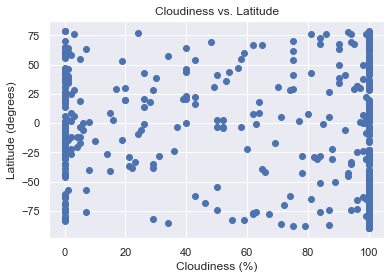

In [15]:
plt.scatter(weather_df.cloudiness, weather_df.latitude)
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude (degrees)")
plt.title("Cloudiness vs. Latitude")
plt.show()

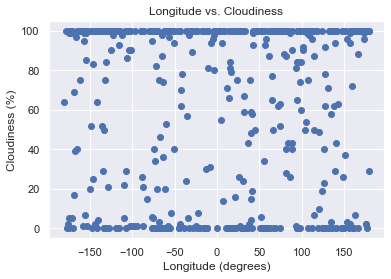

In [16]:
plt.scatter(weather_df.longitude, weather_df.cloudiness)
plt.xlabel("Longitude (degrees)")
plt.ylabel("Cloudiness (%)")
plt.title("Longitude vs. Cloudiness")
plt.show()

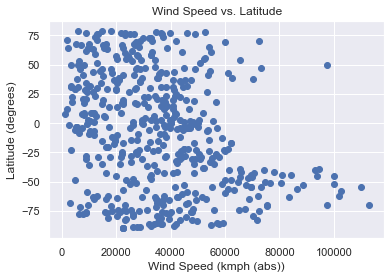

In [17]:
plt.scatter(weather_df.wind, weather_df.latitude)
plt.xlabel("Wind Speed (kmph (abs))")
plt.ylabel("Latitude (degrees)")
plt.title("Wind Speed vs. Latitude")
plt.show()